<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/%EC%96%91%EC%9E%90%ED%9A%8C%EB%A1%9C_Euclidean_Distance_20240419.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
!python3 -m pip install qiskit[visualization]
!python3 -m pip install qiskit-aer
!python3 -m pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-hfejab7e
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-hfejab7e
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [201]:
import qiskit
import qiskit_aer

print(qiskit.__version__)
print(qiskit_aer.__version__)

1.0.2
0.14.0.1


In [202]:
import numpy as np

# 벡터 정의
A = np.array([2, 9, 8, 5])
B = np.array([7, 5, 10, 3])

# 유클리드 거리 계산
distance = np.linalg.norm(A - B)

# 결과 출력
print(f"두 벡터의 유클리드 거리: {distance}")


두 벡터의 유클리드 거리: 7.0


Calculate Quantum Euclidean Distance with Qiskit

https://medium.com/qiskit/calculate-quantum-euclidean-distance-with-qiskit-df85525ab485

In [203]:
#Import the necessary libraries
import math  as m
from qiskit import *
from qiskit_aer import Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

In [204]:
#The first step is to encode the data into quantum states.
#There are some techniques to do it, in this case Amplitude embedding was used

A = [2, 9, 8, 5]
B = [7, 5, 10, 3]

norm_A = 0
norm_B = 0
Dist = 0

for i in range(len(A)):
  norm_A += A[i]**2
  norm_B += B[i]**2
  Dist += (A[i] - B[i]) ** 2
###for

Dist = m.sqrt(Dist)
A_norm = m.sqrt(norm_A)
B_norm = m.sqrt(norm_B)
Z = round( A_norm ** 2 + B_norm ** 2)

# create phi and psi state with the data
phi = [A_norm/m.sqrt(Z), -B_norm/m.sqrt(Z)]
psi = []
for i in range(len(A)):
  psi.append(((A[i]/A_norm) / m.sqrt(2)))
  psi.append(((B[i]/B_norm) / m.sqrt(2)))
###for

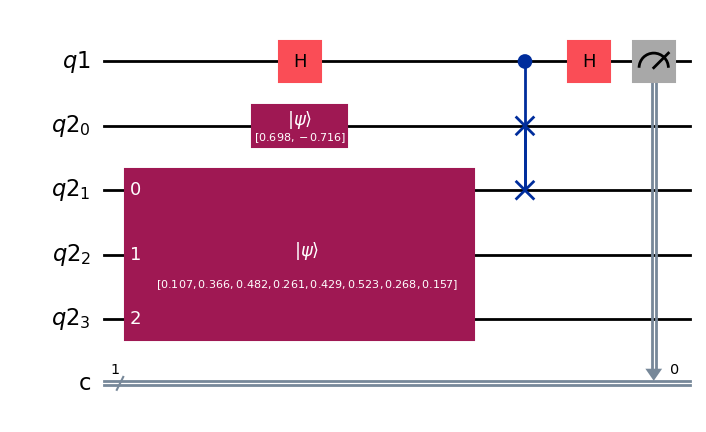

In [205]:
# Quantum Circuit
q1 = QuantumRegister(1, name = 'q1')
q2 = QuantumRegister(4, name = 'q2')
c = ClassicalRegister(1, name = 'c')
qc = QuantumCircuit(q1,q2,c)

#States initialization
qc.initialize(phi, q2[0])
qc.initialize(psi, q2[1:4])

# The swap test operator
#qc.x(qreg[1])

#swap_test
qc.h(q1[0])
qc.cswap(q1[0], q2[0], q2[1])
qc.h(q1[0])
qc.measure(q1,c)

display(qc.draw(output="mpl"))

In [206]:
from qiskit_aer import Aer

shots=1024000
# 시뮬레이터 실행
simulator = Aer.get_backend('statevector_simulator')
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=shots).result()

In [207]:
counts = result.get_counts()

x = abs(((counts['0']/shots - 0.5)/0.5) * 2 * Z)
Q_Dist = round(m.sqrt(x),4)
print('Quantum Distance: ', round(Q_Dist,3))
print('Euclidean Distance: ',round(Dist,3))

Quantum Distance:  6.931
Euclidean Distance:  7.0


In [208]:
print(counts)

{'1': 477555, '0': 546445}


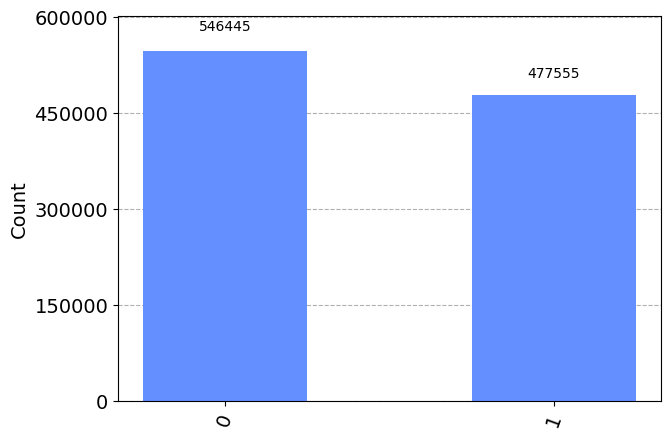

In [209]:
plot_histogram(counts)

In [210]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

from qiskit_textbook.tools import array_to_latex

In [211]:
out_state = result.get_statevector()
print(out_state)

#display(qc.draw('mpl'))
print("\n")
array_to_latex(out_state, pretext="\\text{Statevector} = ", precision=1)
print("\n")


Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+6.71606711e-18j,
              0.00000000e+00+0.00000000e+00j,
             -2.43404828e-01+2.29209256e-17j,
              0.00000000e+00+0.00000000e+00j,
              2.43404828e-01-6.88756876e-18j,
             -0.00000000e+00+0.00000000e+00j,
              0.00000000e+00-2.35062349e-17j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+3.02223020e-17j,
              0.00000000e+00-0.00000000e+00j,
             -3.86773959e-01+1.63720897e-17j,
             -0.00000000e+00+0.00000000e+00j,
              3.86773959e-01-3.09940594e-17j,
             -0.00000000e+00+0.00000000e+00j,
              0.00000000e+00-1.67901678e-17j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+2.68642684e-17j,
              0.00000000e+00+0.00000000e+00j,
             -4.92341583e-01+3.27441794e-17j,
              0.00000000e+00+0.00000000e+00j,
              4.92341583e-01-2.755

<IPython.core.display.Math object>

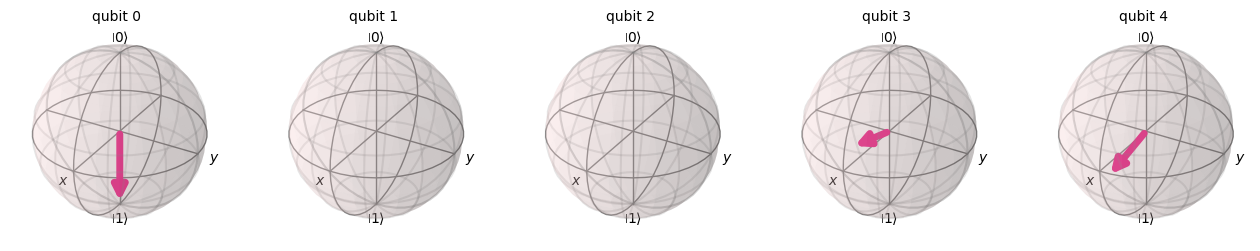

In [212]:
plot_bloch_multivector(out_state)

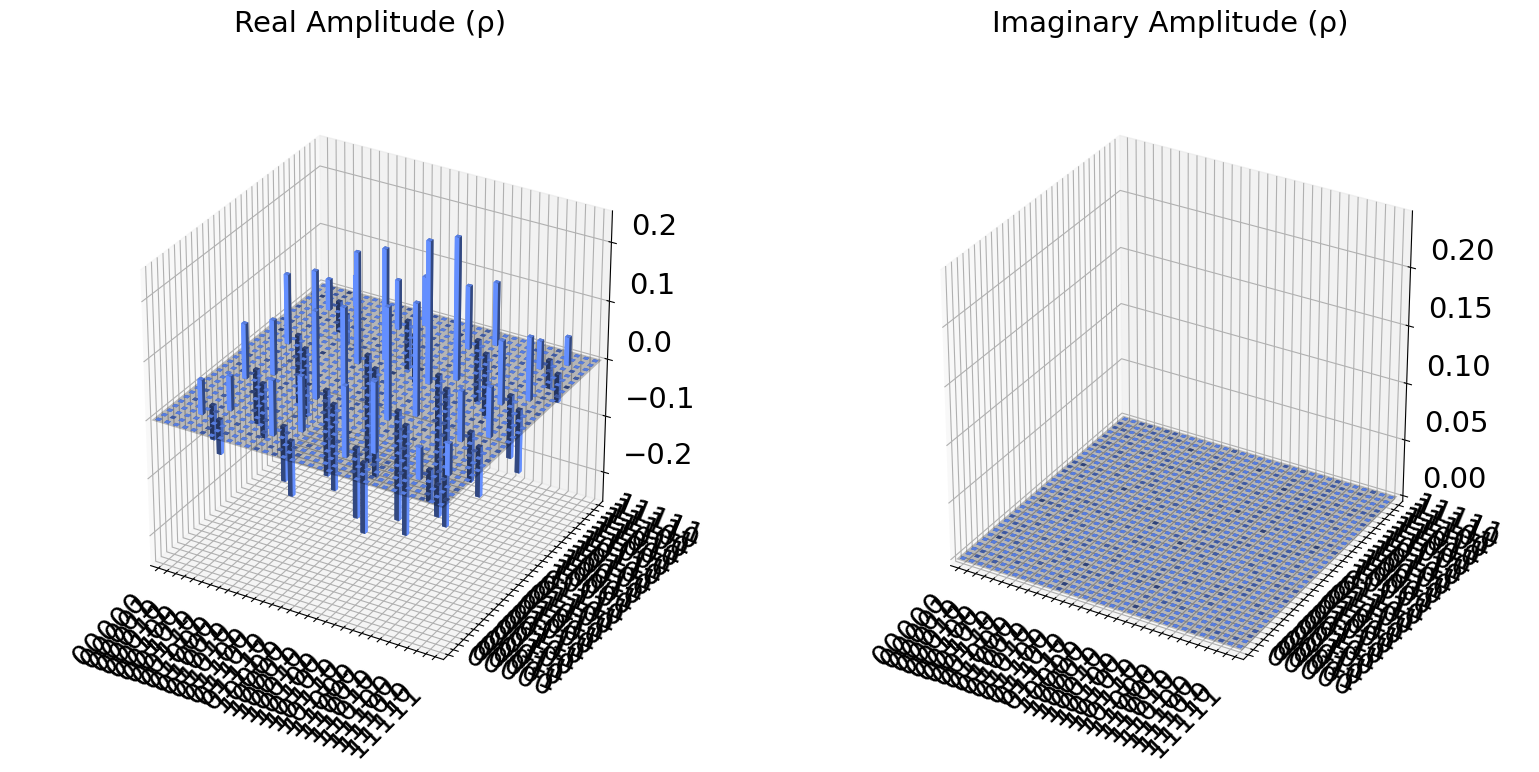

In [213]:
plot_state_city(state=out_state)

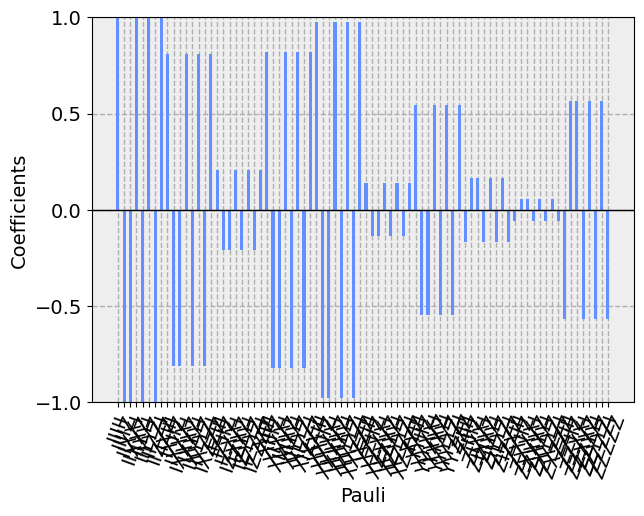

In [214]:
plot_state_paulivec(out_state)

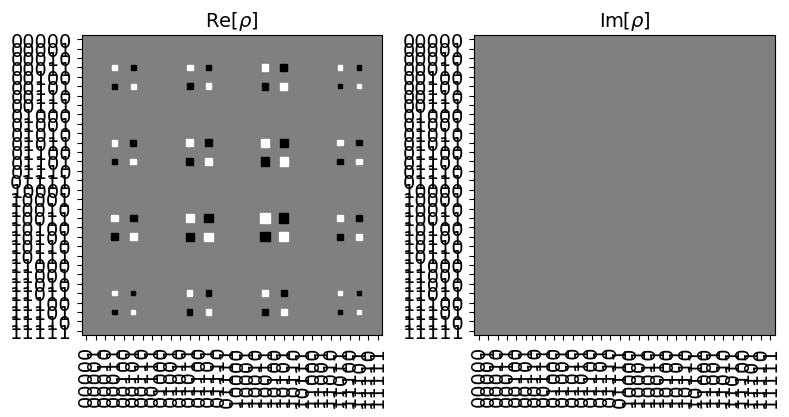

In [215]:
plot_state_hinton(out_state)

In [216]:
import qiskit.utils
qiskit.utils.local_hardware_info()

{'python_compiler': 'GCC 11.4.0',
 'python_build': 'main, Nov 20 2023 15:14:05',
 'python_version': '3.10.12',
 'os': 'Linux',
 'cpus': 1}